In [1]:
import csv
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.linear_model import SGDClassifier

In [2]:
path = 'C:/Users/kvjkv/OneDrive - Aarhus Universitet/7. Semester/BML - Biomedical MachineLearning/prostate158_train/'
trainFile = open(path+'train.csv')
type(trainFile)
csvreader = csv.reader(trainFile)

In [3]:
header = []
header = next(csvreader)
header

['ID',
 't2',
 'adc',
 'dwi',
 't2_anatomy_reader1',
 't2_tumor_reader1',
 'adc_tumor_reader1',
 't2_anatomy_reader2',
 'adc_tumor_reader2']

In [4]:
rows = []
with open(path+'train.csv') as trainFile:
    csvreader = csv.reader(trainFile)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
#print(header)
#print(rows)

In [5]:
#Test af indholdet i rækkerne.
rows[0]

['24',
 'train/024/t2.nii.gz',
 'train/024/adc.nii.gz',
 'train/024/dwi.nii.gz',
 'train/024/t2_anatomy_reader1.nii.gz',
 '',
 'train/024/empty.nii.gz',
 '',
 '']

Opsætning inden indlæsning.

In [6]:
def zoom_function(path1):
    img = nib.load(path1).get_fdata()
    desired_depth = 24
    desired_width = 270
    desired_height = 270

    actual_depth = img.shape[-1]
    actual_width = img.shape[0]
    actual_height = img.shape[1]

    depthfactor = 1/(actual_depth/desired_depth)
    widthfactor = 1/(actual_width/desired_width)
    heightfactor = 1/(actual_height/desired_height)

    newimg = ndimage.zoom(img, (widthfactor, heightfactor, depthfactor), order=1)
    return newimg.reshape(1749600)

Indlæsning af træningsdata.

In [7]:
X_train = np.empty([119,1749600],dtype=float);
label = np.ones(119);
pathtrain = path+'train/';
dirs = os.listdir(pathtrain)
val = rows[0][0];
i = 0;

for idx, x in enumerate(dirs):
    if int(x) is int(val):
        X_train[i] = zoom_function(path+rows[i][1])
        
        if os.path.isfile(pathtrain + x + '/empty.nii.gz'):
            label[i] = 0    
        
        if i < len(rows)-1:
            i+=1;
            val = rows[i][0];

In [8]:
# Løbende tests
#zoom_function(path+rows[1][1])
#print(X_train[5])
print(label)
#rows[3][4]

# os.path.isfile(path + element[0]+'/empty.nii.gz')
# element[0]
# path + element[0]+'/empty.nii.gz'

# test1 = "024";
# test2 = 24;

int(x) == val
dirs
type(val)
print(len(rows))
sum(label)

[0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
119


71.0

Komprimering af data - NYT!

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
X_train_reduced = pca.fit_transform(X_train)
#X_valid_reduced = pca.transform(X_valid)

X_recovered = pca.inverse_transform(X_train_reduced[1]) #decompress

In [59]:
pca1 = PCA(n_components=3)
X_train_reduced1 = pca1.fit_transform(X_train)

In [72]:
print(X_train_reduced1.shape)
X

(119, 3)


array([[ 2.29489436e+04, -4.77783632e+04, -2.54732529e+04],
       [ 2.27761088e+04,  1.15011452e+04, -7.17810181e+03],
       [ 8.62856271e+04,  1.04075810e+05, -7.06498881e+04],
       [ 5.65705632e+04, -4.88048971e+04, -2.22069528e+04],
       [-5.97190205e+04,  3.67114937e+04, -3.68632171e+04],
       [-1.22034262e+05,  2.64481334e+04, -4.01029876e+03],
       [-1.35249888e+05, -6.17437232e+04, -5.18276916e+02],
       [ 3.82091937e+03, -2.25126564e+03,  4.28233299e+04],
       [-4.44026475e+04, -1.96344558e+04,  3.98195025e+04],
       [ 6.64637873e+04,  5.53520001e+04, -1.65605126e+04],
       [ 2.40142227e+04, -5.17404528e+04, -3.00013611e+04],
       [-2.63839422e+03,  6.97770919e+03,  5.31787700e+04],
       [-1.10785787e+05,  7.94238285e+04, -3.81396934e+03],
       [-5.71987889e+04,  1.87388298e+04,  2.71147737e+03],
       [ 8.10827730e+04,  3.28524816e+04,  1.21441821e+05],
       [-2.62269029e+03, -5.92334144e+02, -4.16166200e+04],
       [ 5.13621758e+04,  5.65439963e+03

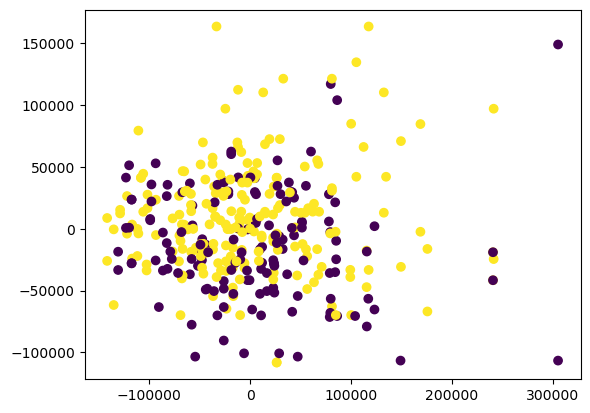

In [86]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(X[:,0],X[:,2],c=label)
plt.scatter(X[:,1],X[:,2],c=label)

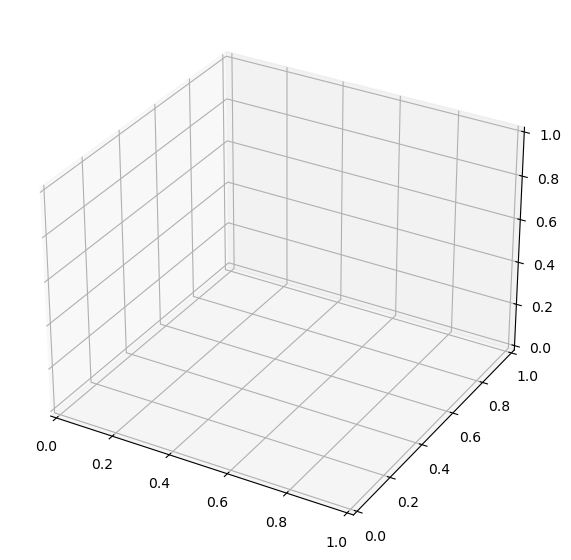

In [80]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D 

axes = [-100, 5000, -100, 5000, -100, 5000]

X = X_train_reduced1;

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = label, cmap=plt.cm.hot)
ax.view_init(-100,5000)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
ax.autoscale_view('tight')

plt.show()

(119, 57)
(119, 1749600)
(1749600,)


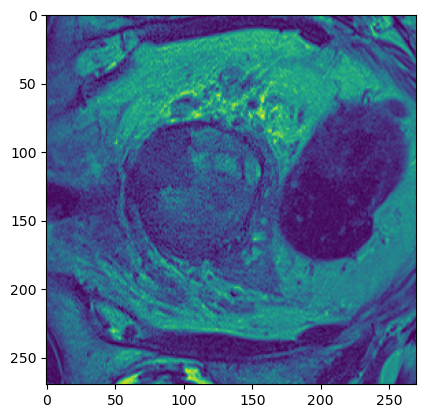

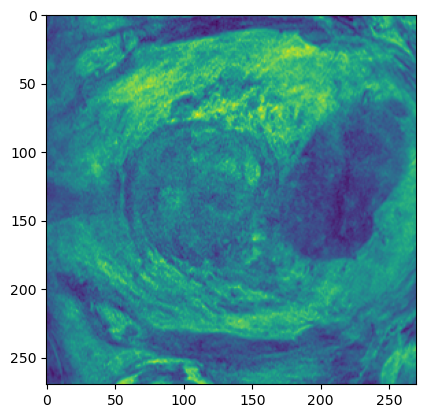

In [10]:
# Test af det komprimerede.
print(X_train_reduced.shape)
print(X_train.shape)
print(X_recovered.shape)

plt.imshow(X_train[1].reshape(270,270,24)[:,:,12])
plt.figure()
plt.imshow(X_recovered.reshape(270,270,24)[:,:,12])

Træn en model ud fra det indlæste data.

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_reduced, label)

SGDClassifier(random_state=42)

In [13]:
# Tidlgiere test. Virker ikke efter kompression.
# id1 = "020";
# id2 = "023";
# file = "/t2.nii.gz";
# pathvald1 = path+'train/'+id1+file;
# pathvald2 = path+'train/'+id2+file;

# X_valid = np.empty([2,1749600],dtype=float);
# X_valid[0] = zoom_function(pathvald1);
# print(sgd_clf.predict([X_valid[0]]))

# X_valid[1] = zoom_function(pathvald2);
# print(sgd_clf.predict([X_valid[1]]))

Indlæsning af valideringsdata til kontrol af modellen.

In [14]:
validFile = open(path+'valid.csv')
type(trainFile)
csvreaderV = csv.reader(validFile)

headerV = []
headerV = next(csvreaderV)
headerV

['ID',
 't2',
 'adc',
 'dwi',
 't2_anatomy_reader1',
 't2_tumor_reader1',
 'adc_tumor_reader1',
 't2_anatomy_reader2',
 'adc_tumor_reader2']

In [15]:
rowsV = []
with open(path+'valid.csv') as validFile:
    csvreaderV = csv.reader(validFile)
    headerV = next(csvreaderV)
    for rowV in csvreaderV:
        rowsV.append(rowV)
#print(header)
#print(rows)

In [16]:
X_valid = np.empty([20,1749600],dtype=float);
labelValid = np.ones(20);
dirsV = os.listdir(pathtrain)
valV = rowsV[0][0];
iV = 0;

for idxV, xV in enumerate(dirsV):
    if int(xV) is int(valV):
        X_valid[iV] = zoom_function(path+rowsV[iV][1])
        
        if os.path.isfile(pathtrain + xV + '/empty.nii.gz'):
            labelValid[iV] = 0    
        
        if iV < len(rowsV)-1:
            iV+=1;
            valV = rowsV[iV][0];

In [17]:
print(X_valid.shape)

X_valid_reduced = pca.transform(X_valid)

labelValid

(20, 1749600)


array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0.])

In [19]:
predictLabel = np.ones(20);

for i in range(0,len(X_valid)):
    predictLabel[i] = sgd_clf.predict([X_valid_reduced[i]]);

In [20]:
predictLabel
#print(X_valid[1])

array([0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1.])

In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train_reduced, label, cv=3, scoring="accuracy")

array([0.7       , 0.65      , 0.56410256])

Performance meassures - Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_reduced, label, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label, y_train_pred)

array([[34, 14],
       [29, 42]], dtype=int64)

In [29]:
y_train_perfect_predictions = label  # pretend we reached perfection
confusion_matrix(label, y_train_perfect_predictions)

array([[48,  0],
       [ 0, 71]], dtype=int64)

Precision/Recall Trade-off

In [31]:
y_scores = sgd_clf.decision_function([X_valid_reduced[1]])
y_scores

array([-5.84824819e+10])

In [32]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [33]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train_reduced, label, cv=3,
                             method="decision_function")

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(label, y_scores)

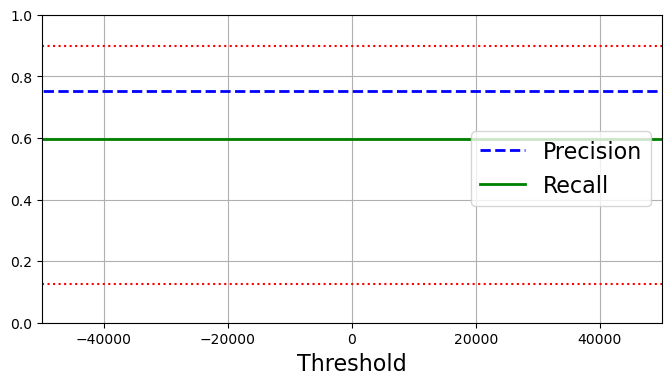

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [37]:
(y_train_pred == (y_scores > 0)).all()

True

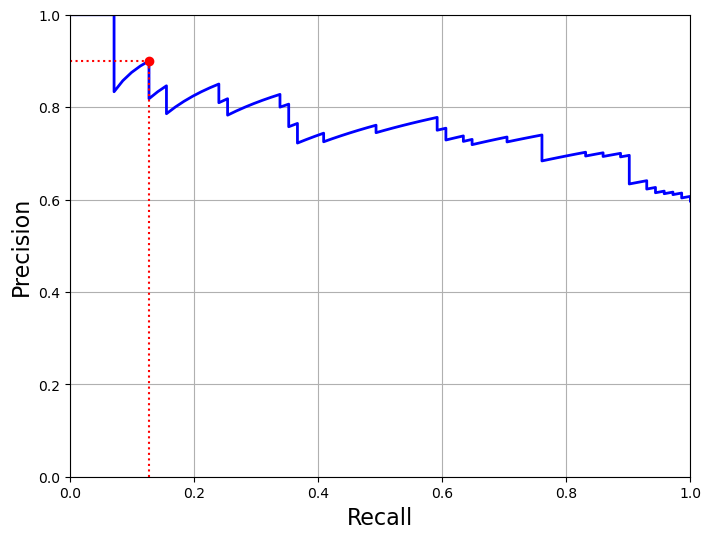

In [38]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

In [39]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

178895400312.8414

In [40]:
from sklearn.metrics import precision_score

y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(label, y_train_pred_90)

0.9

ROC Kurve

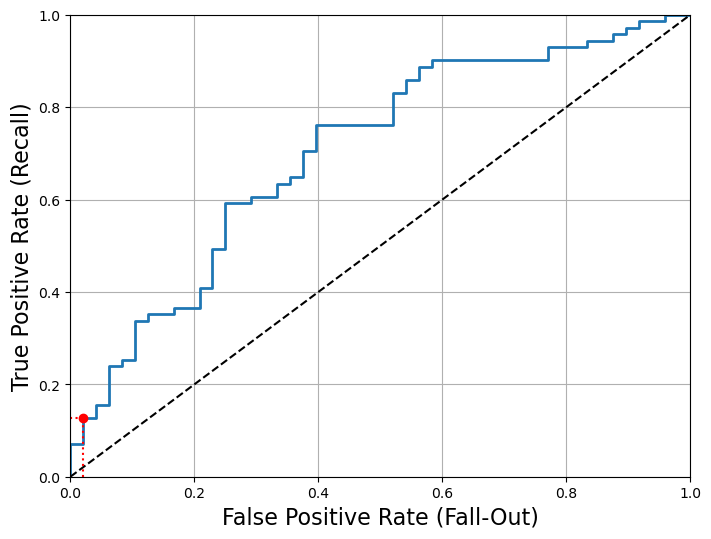

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(label, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(label, y_scores)

0.7027582159624413

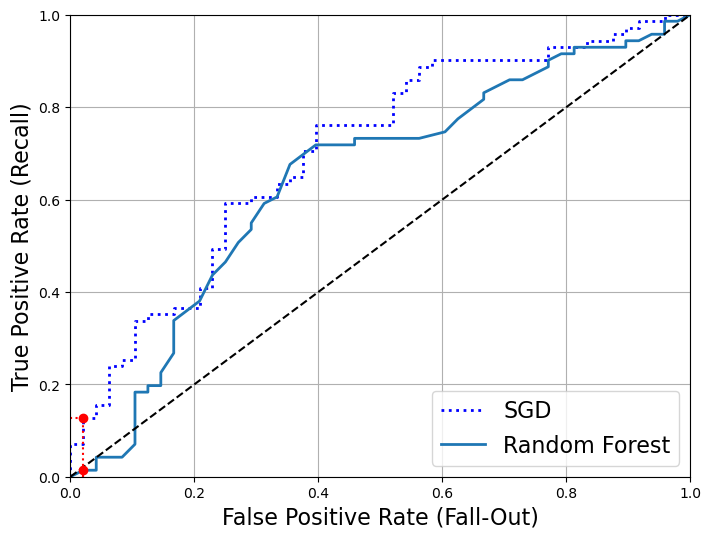

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, label, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(label,y_scores_forest)

recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [44]:
roc_auc_score(label, y_scores_forest)

0.6436326291079811

In [45]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, label, cv=3)
precision_score(label, y_train_pred_forest)

0.6483516483516484

In [46]:
from sklearn.metrics import recall_score

recall_score(label, y_train_pred_forest)

0.8309859154929577